In [1]:
!unzip text_classification_ecomm.zip

Archive:  text_classification_ecomm.zip
  inflating: ecommerceDataset.csv    


In [1]:
import pandas as pd

## Checking Data


In [2]:
column_names = ["Class", "Text"]
df = pd.read_csv("ecommerceDataset.csv", header=None, names=column_names)

In [3]:
df.head()

,Class,Text
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [4]:
df.tail()

,Class,Text
50420,Electronics,Strontium MicroSD Class 10 8GB Memory Card (Bl...
50421,Electronics,CrossBeats Wave Waterproof Bluetooth Wireless ...
50422,Electronics,Karbonn Titanium Wind W4 (White) Karbonn Titan...
50423,Electronics,"Samsung Guru FM Plus (SM-B110E/D, Black) Colou..."
50424,Electronics,Micromax Canvas Win W121 (White)


In [5]:
df.at[0,"Text"]

'Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and some for eternal blis

In [6]:
df.at[50423,"Text"]

'Samsung Guru FM Plus (SM-B110E/D, Black) Colour:Black   Compact Design If you are looking for a phone that is both simple and sturdy, checkout the Samsung Guru FM Plus SM-B110E/D Mobile Phone. At a pocket-friendly price, comes this plain black Feature Mobile Phone to serve all your basic needs. With the dependable trust of Samsung, moreover, you experience its glitch-free seamless functionality. Guru FM Plus Phone comes packed with 208 MHz Single-Core Processor and 4 MB RAM. Further, the Dual 2G GSM SIM Mobile Phone is light-weight at 66 gm and extremely easy-to-operate letting you stay connected with your friends and family always. Display and User-Friendly Interface This Samsung Guru Handset features 1.5 inches TFT Display and gives you a vista of useful widgets. Owing to its 65 K Colour Support, the screen looks colourfully radiant. Guru FM Plus Phone gives you immense comfort of view as well. Your recent calls streamline better. The major menu icons are more user-responsive. And, 

## Checking For Missing Values

In [7]:
missing_values = df.isnull().sum()


In [8]:
missing_values

Class    0
Text     1
dtype: int64

In [9]:
missing_indexes = df[df.isnull().any(axis=1)].index


In [10]:
missing_indexes

Int64Index([39330], dtype='int64')

In [11]:
df_cleaned = df.dropna()

df_cleaned = df_cleaned.reset_index(drop=True)

In [12]:
df = df_cleaned

## Dropping Duplicates

In [13]:
df = df.drop_duplicates(subset='Text', keep='first')
df = df.dropna()
df = df.reset_index(drop=True)

## Checking Distribution

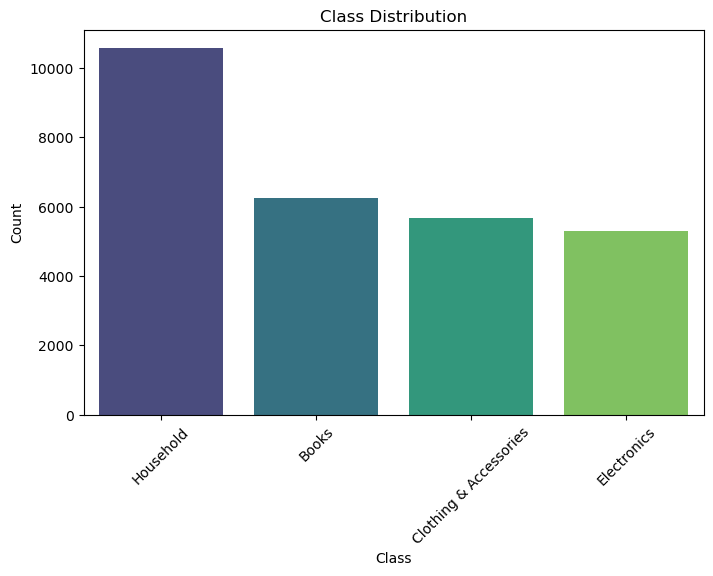

Class Distribution:
 Household                 10564
Books                      6256
Clothing & Accessories     5674
Electronics                5308
Name: Class, dtype: int64


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of each class
class_counts = df['Class'].value_counts()

# Plot distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.xticks(rotation=45)
plt.show()

# Print counts
print("Class Distribution:\n", class_counts)


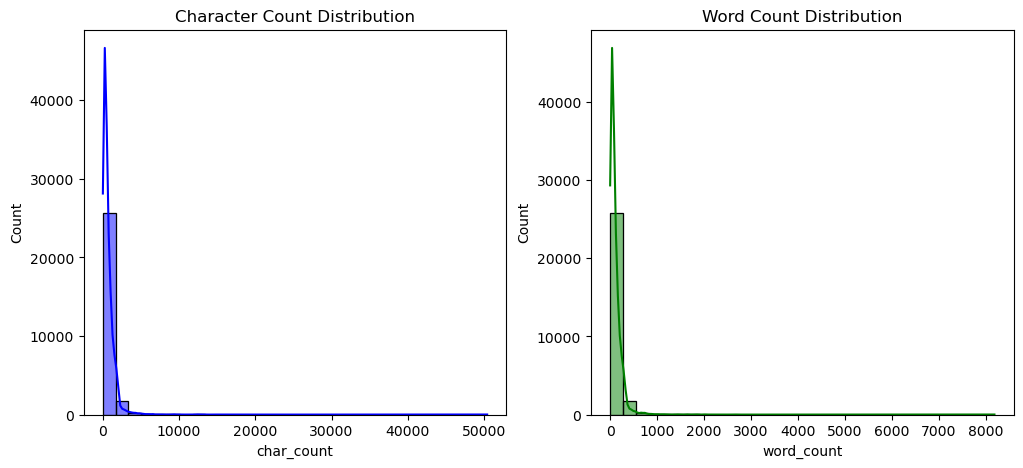

         char_count    word_count
count  27802.000000  27802.000000
mean     699.994928    111.886915
std     1023.019517    166.116128
min        4.000000      1.000000
25%      215.000000     34.000000
50%      473.000000     76.000000
75%      916.750000    146.000000
max    50403.000000   8181.000000


In [15]:
import numpy as np

# Add text length columns
df['char_count'] = df['Text'].apply(len)
df['word_count'] = df['Text'].apply(lambda x: len(str(x).split()))

# Plot histograms
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['char_count'], bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Character Count Distribution')

sns.histplot(df['word_count'], bins=30, kde=True, ax=axes[1], color='green')
axes[1].set_title('Word Count Distribution')

plt.show()

# Print statistics
print(df[['char_count', 'word_count']].describe())

## Detecting Outliers

In [16]:
import numpy as np

# Function to detect outliers using IQR
def detect_outliers(series):
    Q1 = np.percentile(series, 25)  # First quartile (25%)
    Q3 = np.percentile(series, 75)  # Third quartile (75%)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = max(0, Q1 - 1.5 * IQR)
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Compute outlier thresholds
char_lower, char_upper = detect_outliers(df['char_count'])
word_lower, word_upper = detect_outliers(df['word_count'])

# Identify outliers
char_outliers = df[(df['char_count'] < char_lower) | (df['char_count'] > char_upper)]
word_outliers = df[(df['word_count'] < word_lower) | (df['word_count'] > word_upper)]

# Print outlier statistics
print(f"Character Count Outliers: {char_outliers.shape[0]} out of {df.shape[0]} samples")
print(f"Word Count Outliers: {word_outliers.shape[0]} out of {df.shape[0]} samples")


Character Count Outliers: 1147 out of 27802 samples
Word Count Outliers: 1208 out of 27802 samples


In [17]:
print(word_upper)

314.0


In [18]:
print(word_lower)

0


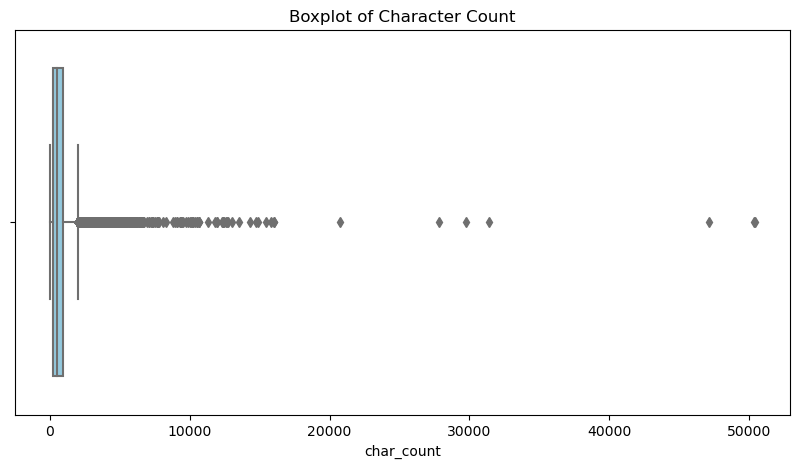

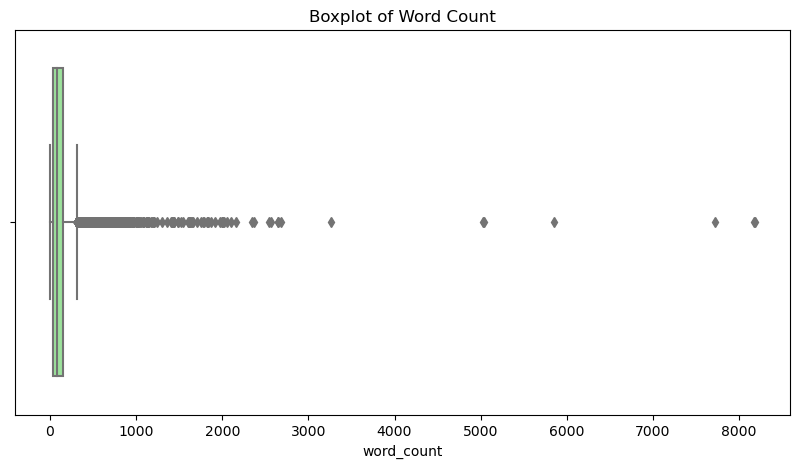

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot character count boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['char_count'], color='skyblue')
plt.title("Boxplot of Character Count")
plt.show()

# Plot word count boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['word_count'], color='lightgreen')
plt.title("Boxplot of Word Count")
plt.show()

## Checking Long Words

In [21]:
# Function to find words with length greater than 500
def find_long_words(text):
    # Tokenize the text into words
    words = text.split()
    # Filter words with length greater than 500
    long_words = [word for word in words if len(word) > 100]
    return long_words

# Apply the function to the text column and create a new column with long words
df['long_words'] = df['Text'].apply(find_long_words)

# Filter rows with long words
long_words_df = df[df['long_words'].str.len() > 0]

# Display the rows containing long words
print(long_words_df[['Class', 'long_words']].head())


           Class                                         long_words
6575   Household  [taste.blender#mixer#bottle#brush#hand#beauty#...
8213   Household  [TypeHandheld/Canister/UprightHandheldCanister...
8367   Household  [SC323BC425SC425BC430SC4ASINB00A7PGI18B00OLP0G...
10555  Household  [computer.a#dictionary#of#basic#japanese#gramm...
14048      Books  [//www.accdistribution.com/us/store/pv/9789383...


In [25]:
len(long_words_df)

24

In [81]:
df.at[2, 'Text']

"SAF 'UV Textured Modern Art Print Framed' Painting (Synthetic, 35 cm x 50 cm x 3 cm, Set of 3) Color:Multicolor                                                                                \xa0|\xa0                           Size:35 cm x 50 cm x 3 cm   Overview a beautiful painting involves the action or skill of using paint in the right manner; hence, the end product will be a picture that can speak a thousand words they say. Arts have been in trend for quite some time now. It can give different viewer different meanings style and design the SAF wood matte abstract painting with frame is quite abstract and mysteriously beautiful. The painting has a nice frame to it. You can gift this to a family or a friend. The painting has various forms of certain figures on it as seen in the image. You can add a good set of lights to the place where the painting is and the decor will give a different feel and look to the place. Quality and durability the painting has a matte finish and includes 

## Checking Random Values to Understand Noisy Text

In [38]:
import random

# Randomly pick a row from the DataFrame
random_row = df.sample(n=1, random_state=random.randint(1, 27802))

# Display the text from the randomly picked row
print(random_row['Class'].values[0],random_row['Text'].values[0])

Household Whirlpool 190 L 3 Star Direct-Cool Single-Door Refrigerator (WDE 205 ROY 3S, Sapphire Fiesta) Color:Sapphire Fiesta   The refrigerator comes with fastest ice making technology which effortlessly maintains coldest of temperatures. The refrigerator shelf is made of toughened glass and it has unique chrome recess handle.


## Noted Few Observations

## Understanding Word Counts

In [44]:
low_words_df = df[df['word_count'] < 5]

In [45]:
low_words_df

,Class,Text,char_count,word_count,long_words,contains_hashtag
581,Household,Quechua Arpenaz 50 Hammock,26,4,[],False
909,Household,Ebee Multipurpose Rack (Blue),29,4,[],False
1341,Household,Tulip Recliner Chair (Black),28,4,[],False
1592,Household,Defianz Sit-Stand Desktop Workstation,37,4,[],False
2884,Household,Colouring Book of Rangoli,26,4,[],False
...,...,...,...,...,...,...
24565,Electronics,AmazonBasics Nylon CD/DVD Binder,32,4,[],False
25430,Electronics,"AmazonBasics Camera Sling Strap,Black",37,4,[],False
25764,Electronics,Skylight,9,1,[],False
25829,Electronics,Hemi Sync Metamusic Sampler,27,4,[],False


In [46]:
high_words_df = df[df['word_count'] > 1000]

In [47]:
high_words_df

,Class,Text,char_count,word_count,long_words,contains_hashtag
77,Household,The Overlocker Technique Manual: The Complete ...,10168,1791,[],False
5203,Household,The Unofficial Harry Potter Cookbook: From Cau...,6670,1090,[],False
5480,Household,"Lock&Lock Classics Tall Rectangular Bread Box,...",6604,1013,[],False
5484,Household,Lock&Lock Classics Rectangular Food Container ...,6623,1019,[],False
7907,Household,KitchenAid Artisan 5KSM150PSDER 10 Speed 4.7 L...,8308,1305,[],False
...,...,...,...,...,...,...
23652,Electronics,Traffic: Why We Drive the Way We Do (and What ...,6594,1017,[],False
24052,Electronics,Quick Heal Total Security Latest Version - 2 P...,12473,1870,[],False
25759,Electronics,"Skylight Review ""The inklings of Saramago s st...",7115,1111,[],False
26210,Electronics,Nikon D5300 24.2MP Digital SLR Camera(Black) w...,11319,1703,[],False


In [49]:
df.at[77, 'Text']

"The Overlocker Technique Manual: The Complete Guide to Serging and Decorative Stitching Review Aug 2014 This is the third of the books that Search Press sent to me for review purposes. I chose to review it because although more and more home sewists are investing in overlockers (or `sergers'), it seems to me that they are often perceived as `scary' machines - so I thought this book might appeal! I bought my overlocker in 2011 and it probably wasn't until last year that I actually nailed how to rethread the thing quickly. To be perfectly honest, it wasn't the threading that was an issue: although a bit fiddly, I can do that bit in a couple of minutes. No, it was getting the tension of all the threads right that took hours. It became like a jackpot - sometimes I would rethread and it would be fine straight away, and other times I would fiddle about for hours. One day last year, out of pure frustration, whilst feeding my test scraps of fabric through and trying to get the right tension, 

## Checking Hastags

In [50]:
import re
# df = pd.DataFrame(data)

# Function to check for hashtags in text
def contains_hashtag(text):
    return bool(re.search(r'#\S+', text))  # Regex to check for hashtags

# Apply function to check for hashtags
df['contains_hashtag'] = df['Text'].apply(contains_hashtag)

# Count rows with and without hashtags
hashtag_count = df['contains_hashtag'].sum()
no_hashtag_count = len(df) - hashtag_count

# Display counts
print(f"Rows with hashtags: {hashtag_count}")
print(f"Rows without hashtags: {no_hashtag_count}")

Rows with hashtags: 206
Rows without hashtags: 27596


## Understanding common words and bi-grams and tri-grams

In [55]:
from collections import Counter
import nltk

# Ensure you have the necessary nltk resources (like stopwords)
nltk.download('stopwords')
from nltk.corpus import stopwords

# Tokenize the text and remove stopwords
stop_words = set(stopwords.words('english'))

# Function to clean and tokenize text
def tokenize_and_clean(text):
    # Tokenize the text
    words = text.split()
    # Remove stopwords and non-alphabetical characters
    words = [word.lower() for word in words if word.isalpha() and word not in stop_words]
    return words

# Apply tokenization
df['tokens'] = df['Text'].apply(tokenize_and_clean)

# Get all tokens from the entire dataset
all_tokens = [token for sublist in df['tokens'] for token in sublist]

# Count word frequencies
word_counts = Counter(all_tokens)

# Display the 10 most common words
print("Most Common Words:", word_counts.most_common(10))


[nltk_data] Downloading package stopwords to /home/ubuntu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Most Common Words: [('the', 20357), ('this', 9266), ('it', 8004), ('x', 6816), ('made', 5993), ('easy', 5627), ('set', 5503), ('also', 5396), ('quality', 5283), ('one', 5125)]


In [53]:
df

,Class,Text,char_count,word_count,long_words,contains_hashtag,tokens
0,Household,Paper Plane Design Framed Wall Hanging Motivat...,1338,228,[],False,"[paper, plane, design, framed, wall, hanging, ..."
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",346,59,[],False,"[saf, framed, painting, inch, x, special, effe..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...,1316,224,[],False,"[saf, textured, modern, art, print, painting, ..."
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1...",1091,184,[],False,"[saf, flower, print, framed, painting, inch, x..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...,989,184,[],False,"[incredible, gifts, india, wooden, happy, birt..."
...,...,...,...,...,...,...,...
27797,Electronics,Micromax Bharat 5 Plus Zero impact on visual d...,144,24,[],False,"[micromax, bharat, plus, zero, impact, visual,..."
27798,Electronics,Microsoft Lumia 550 8GB 4G Black Microsoft lum...,1924,338,[],False,"[microsoft, lumia, black, microsoft, lumia, ex..."
27799,Electronics,"Microsoft Lumia 535 (Black, 8GB) Colour:Black ...",3931,660,[],False,"[microsoft, lumia, product, description, high,..."
27800,Electronics,Karbonn Titanium Wind W4 (White) Karbonn Titan...,1653,288,[],False,"[karbonn, titanium, wind, karbonn, titanium, w..."


In [56]:
from nltk import ngrams

# Function to generate bigrams and trigrams
def get_ngrams(tokens, n):
    return list(ngrams(tokens, n))

# Generate bigrams and trigrams for the entire dataset
df['bigrams'] = df['tokens'].apply(lambda tokens: get_ngrams(tokens, 2))
df['trigrams'] = df['tokens'].apply(lambda tokens: get_ngrams(tokens, 3))

# Flatten the bigram and trigram lists
all_bigrams = [bigram for sublist in df['bigrams'] for bigram in sublist]
all_trigrams = [trigram for sublist in df['trigrams'] for trigram in sublist]

# Count bigram and trigram frequencies
bigram_counts = Counter(all_bigrams)
trigram_counts = Counter(all_trigrams)

# Display the 10 most common bigrams and trigrams
print("Most Common Bigrams:", bigram_counts.most_common(10))
print("Most Common Trigrams:", trigram_counts.most_common(10))

Most Common Bigrams: [(('about', 'author'), 2741), (('stainless', 'steel'), 2178), (('high', 'quality'), 1546), (('x', 'x'), 1393), (('product', 'description'), 973), (('new', 'york'), 851), (('cm', 'x'), 550), (('see', 'product'), 547), (('it', 'also'), 532), (('york', 'times'), 516)]
Most Common Trigrams: [(('see', 'product', 'description'), 546), (('new', 'york', 'times'), 480), (('x', 'x', 'x'), 360), (('made', 'high', 'quality'), 342), (('x', 'cm', 'x'), 253), (('cm', 'x', 'cm'), 243), (('about', 'author', 'an'), 175), (('team', 'highly', 'skilled'), 170), (('brand', 'new', 'high'), 164), (('an', 'editorial', 'team'), 164)]
